## 1.1 Intro

This is my first ML project. I decided to start with "Titanic - Machine Learning from Disaster" as it seemed an interesting problem for begginer, and sometimes is reffered as "Hello world in Machine Learning". 
Additionaly, there are a lot of resorces to help navigate the project, from very simple ones, to more complex.
The most helpful resources I came across were posted in Kaggle, also the article on Medium was quiet neat.
Please note that this is just a try, and it's more of me trying to navigate this huge amount of new information.
My main goal was
    <br>* geater as much info as I can without getting overwhelmed, see what is a good practice when doing this challange
    <br>* try to understand every line of code I encounter, and maybe find out why the choice ended on that method specifically
    <br>* have at least 75% accuracy in my prediction
    <br>* not to stress much and try to have fun
    
Thank you:)


In [1]:
# Load libraries for analysis and visualization
import pandas as pd # Collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # Foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt  # Collection of functions for scentific and publication-ready visualization
%matplotlib inline
import plotly.offline as py   # Open source library for composing, editing, and sharing interactive data visualization
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter #This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.
import seaborn as sns

# Machine learning libraries
import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speen and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotliv, provides interface for drawing attractive statistical graphics

import sklearn      # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## 1.2 Loading dataset


In [2]:
# Load in the train and test datasets from the CSV files
train = pd.read_csv('folder/train.csv') # Takes from the same folder as the file
test = pd.read_csv('folder/test.csv')

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

# Display the first 50 rows of the dataset. a first look at our data
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# First 5 row, 5 sample rows and basic statistics
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1.3 First look into data

Text(0.5, 1.0, 'Missing values heatmap')

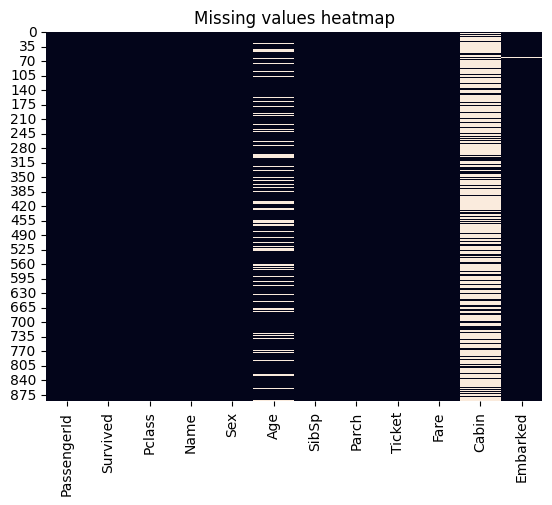

In [6]:
sns.heatmap(train.isnull(), cbar = False).set_title("Missing values heatmap")

Text(0.5, 1.0, 'Survival rate by gender and fare')

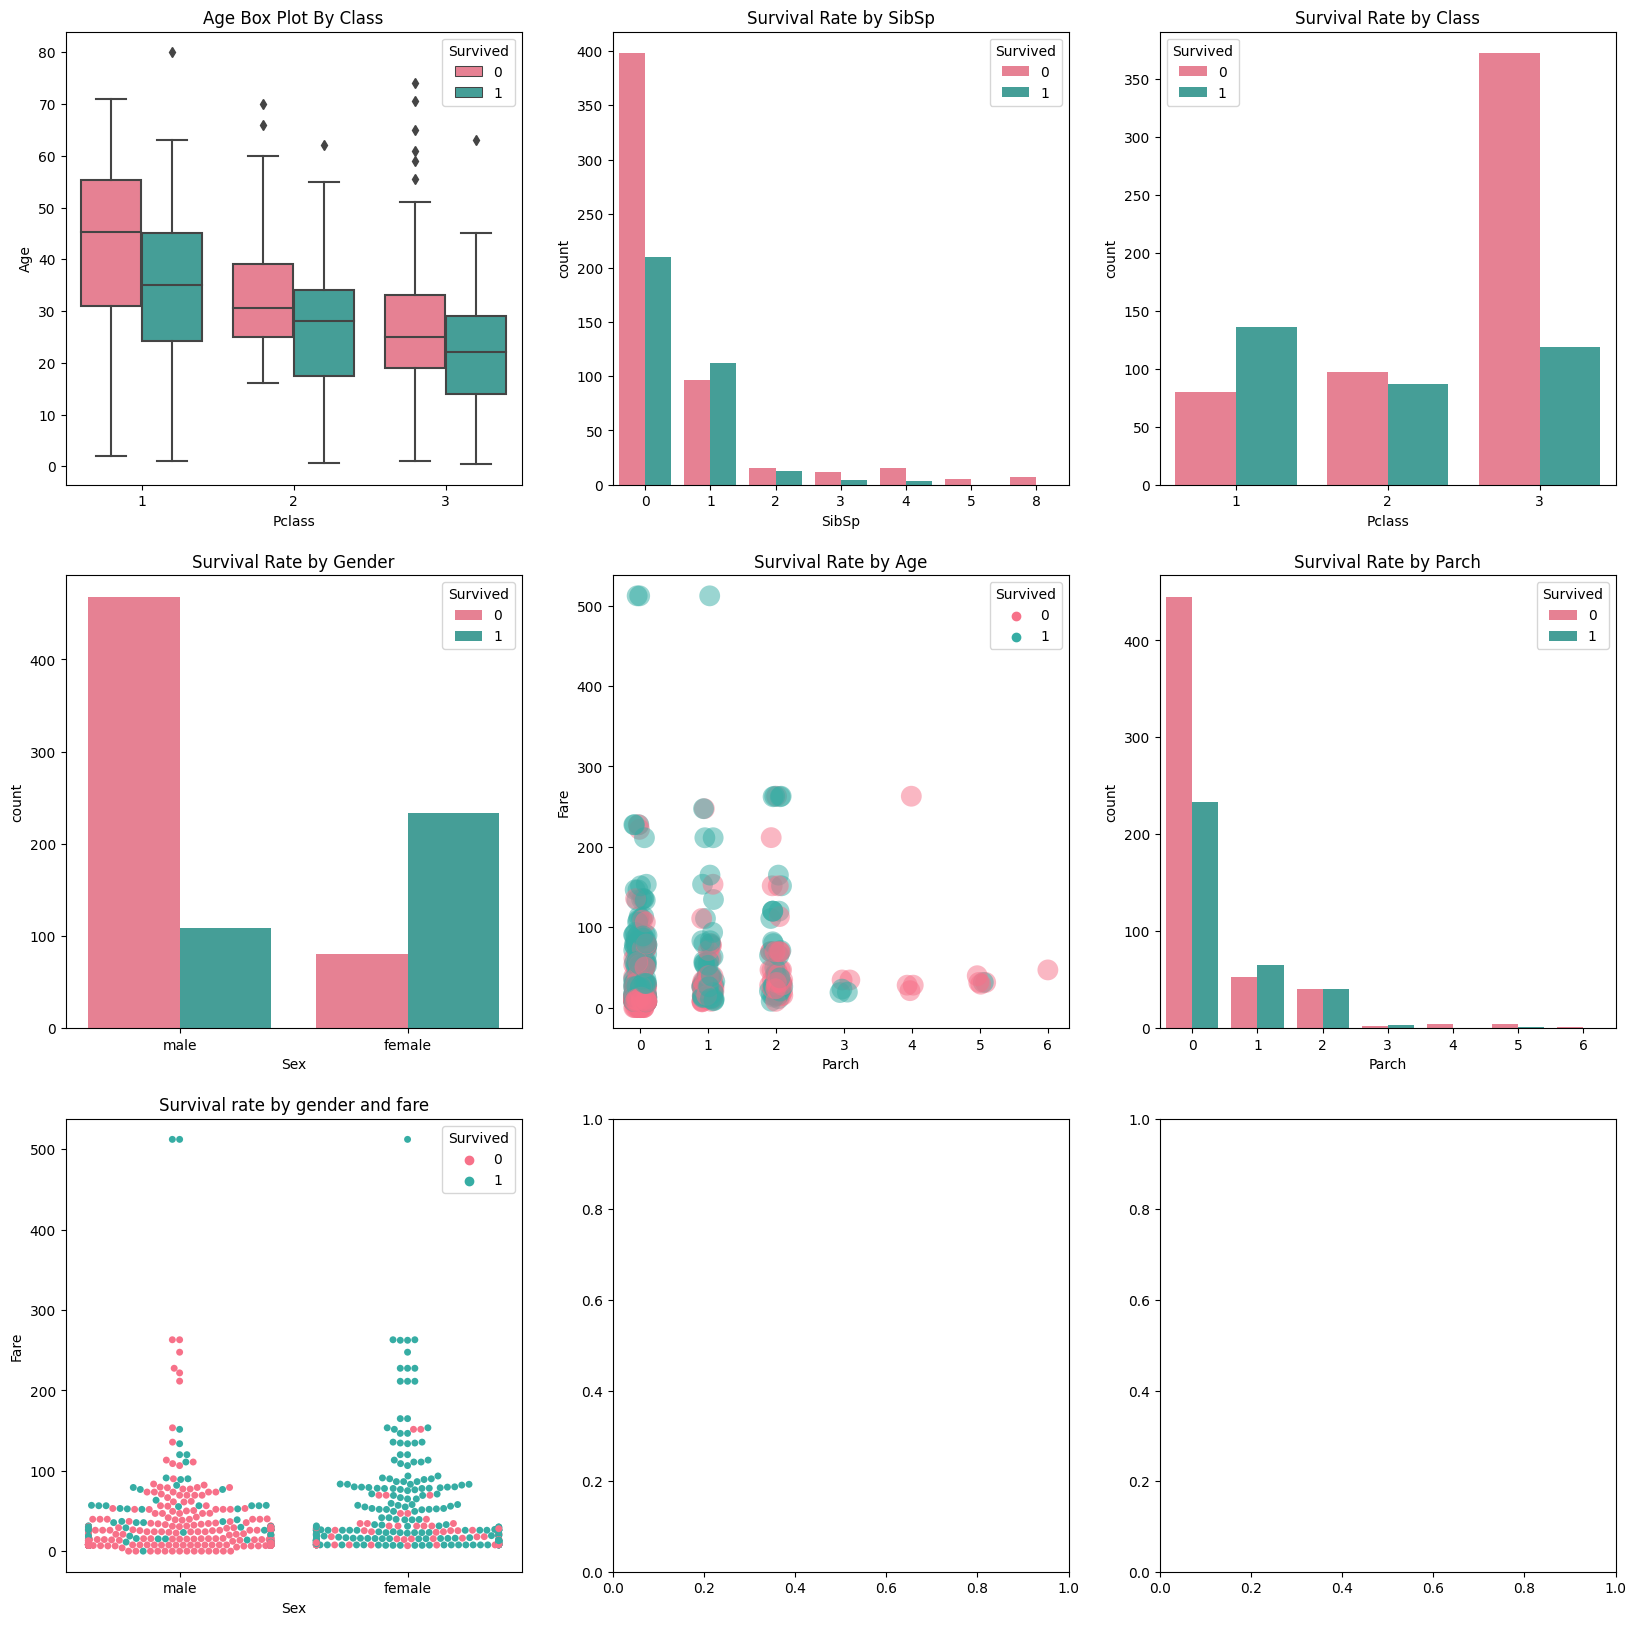

In [45]:
f,ax=plt.subplots(3,3, figsize=(20, 20))
sns.boxplot(x='Pclass',y='Age', hue='Survived', data=train,ax=ax[0,0],palette='husl') # count how are the classes spread across the ages
ax[0,0].set_title('Age Box Plot By Class')
sns.countplot(x='SibSp',hue='Survived',data=train,ax=ax[0,1],palette='husl') # counts how many siblings a person had and how many of them survived
ax[0,1].set_title('Survival Rate by SibSp')

sns.countplot(x='Pclass',hue='Survived',data=train,ax=ax[0,2],palette='husl') # the ratio of survived in each class
ax[0,2].set_title('Survival Rate by Class')
sns.countplot(x='Sex',hue='Survived',data=train,ax=ax[1,0],palette='husl') # the ratio of survived in each gender
ax[1,0].set_title('Survival Rate by Gender')
sns.stripplot(x='Parch',y='Fare',hue='Survived',data=train,ax=ax[1,1],native_scale=True, s=15,edgecolor='none', alpha=.5,palette='husl') # Two graphs showing the ration of age distribution of survived/not survived
ax[1,1].set_title('Survival Rate by Age')
sns.countplot(x='Parch',hue='Survived',data=train,ax=ax[1,2],palette='husl') # the survival rate by family members
ax[1,2].set_title('Survival Rate by Parch')

sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=train, ax=ax[2,0], palette='husl')
ax[2,0].set_title('Survival rate by gender and fare')


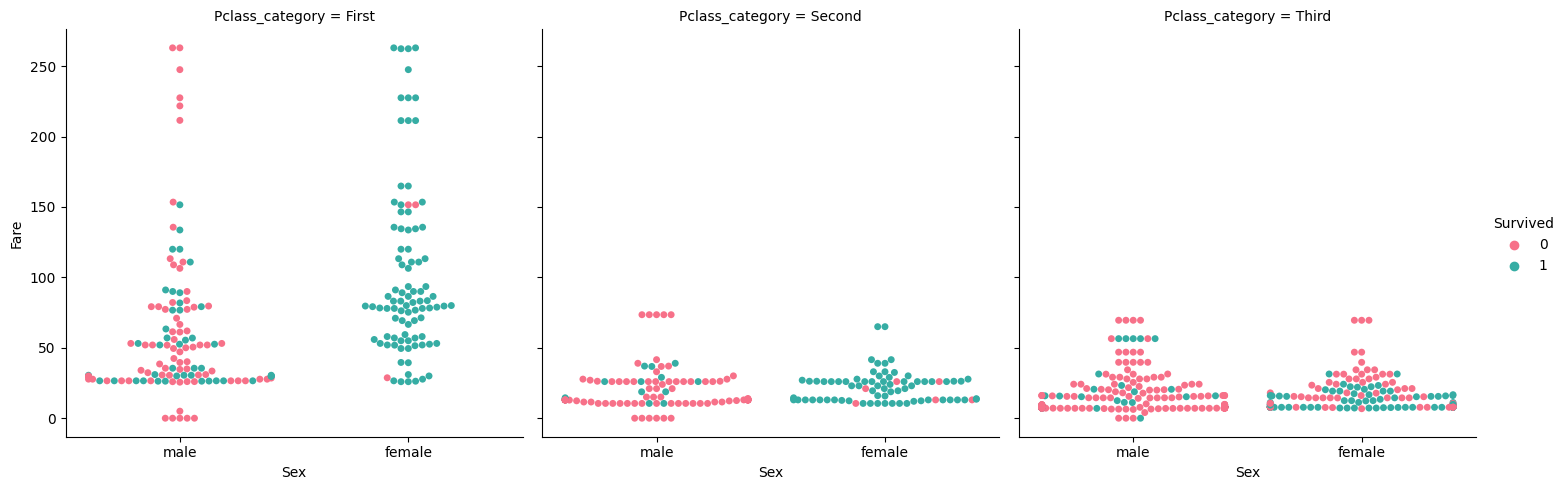

In [41]:
bins_class = [0,1,2,3]
labels_class = ['First','Second','Third']
train['Pclass_category']=pd.cut(train['Pclass'],bins=bins_class, labels=labels_class)

#bins_fare= [0,10,40,60,100,199,600]
#labels_fare = ['~10','~40','~60','~100','~200','~600']
#train['Fare_category']=pd.cut(train['Fare'],bins=bins_fare, labels=labels_fare)
Fare_wo_outliers=train[train['Fare']<500]
sns.catplot( y='Fare', x='Sex',  hue='Survived', data=Fare_wo_outliers, col='Pclass_category', kind="swarm", palette='husl')

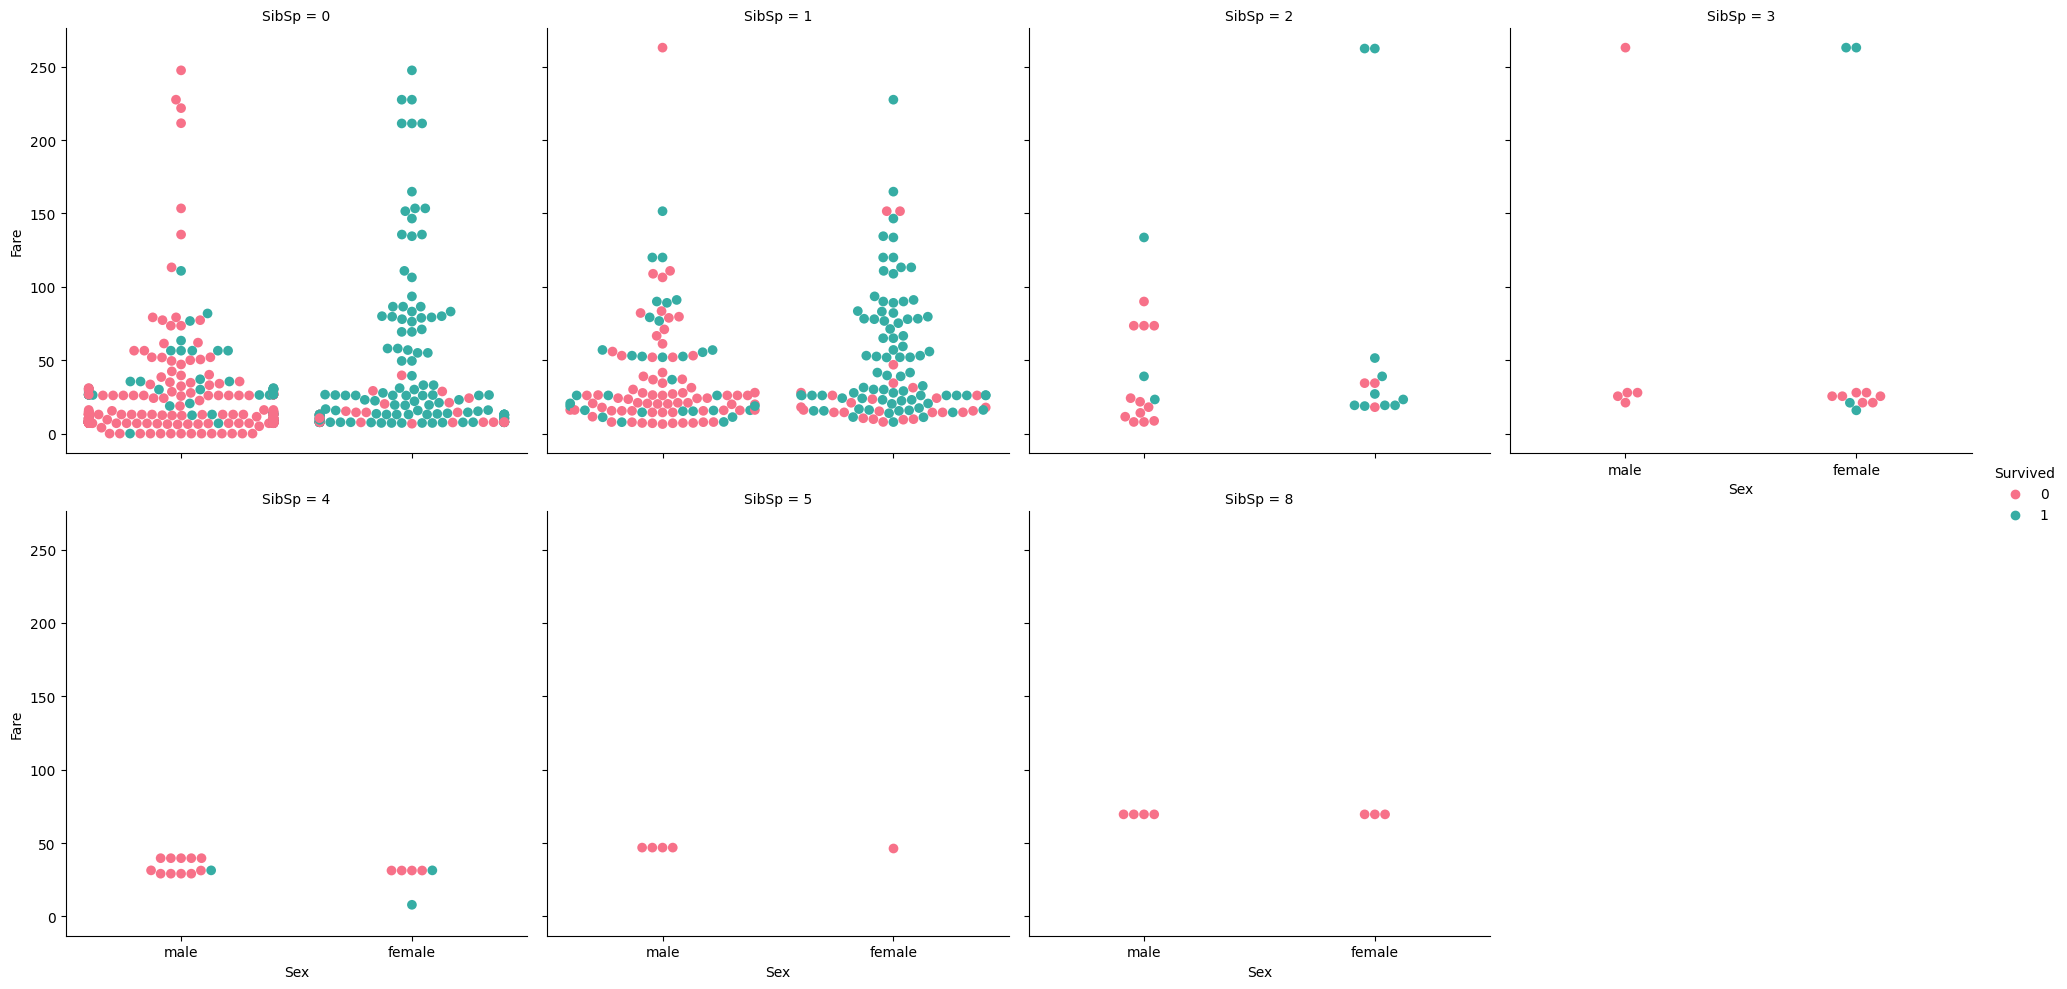

In [40]:

sns.catplot( y='Fare', x='Sex',  hue='Survived', data=Fare_wo_outliers, col='SibSp', size=7, kind="swarm", palette='husl',col_wrap=4)

Text(0.5, 1.0, 'Survival Rate by Fare and Embarked')

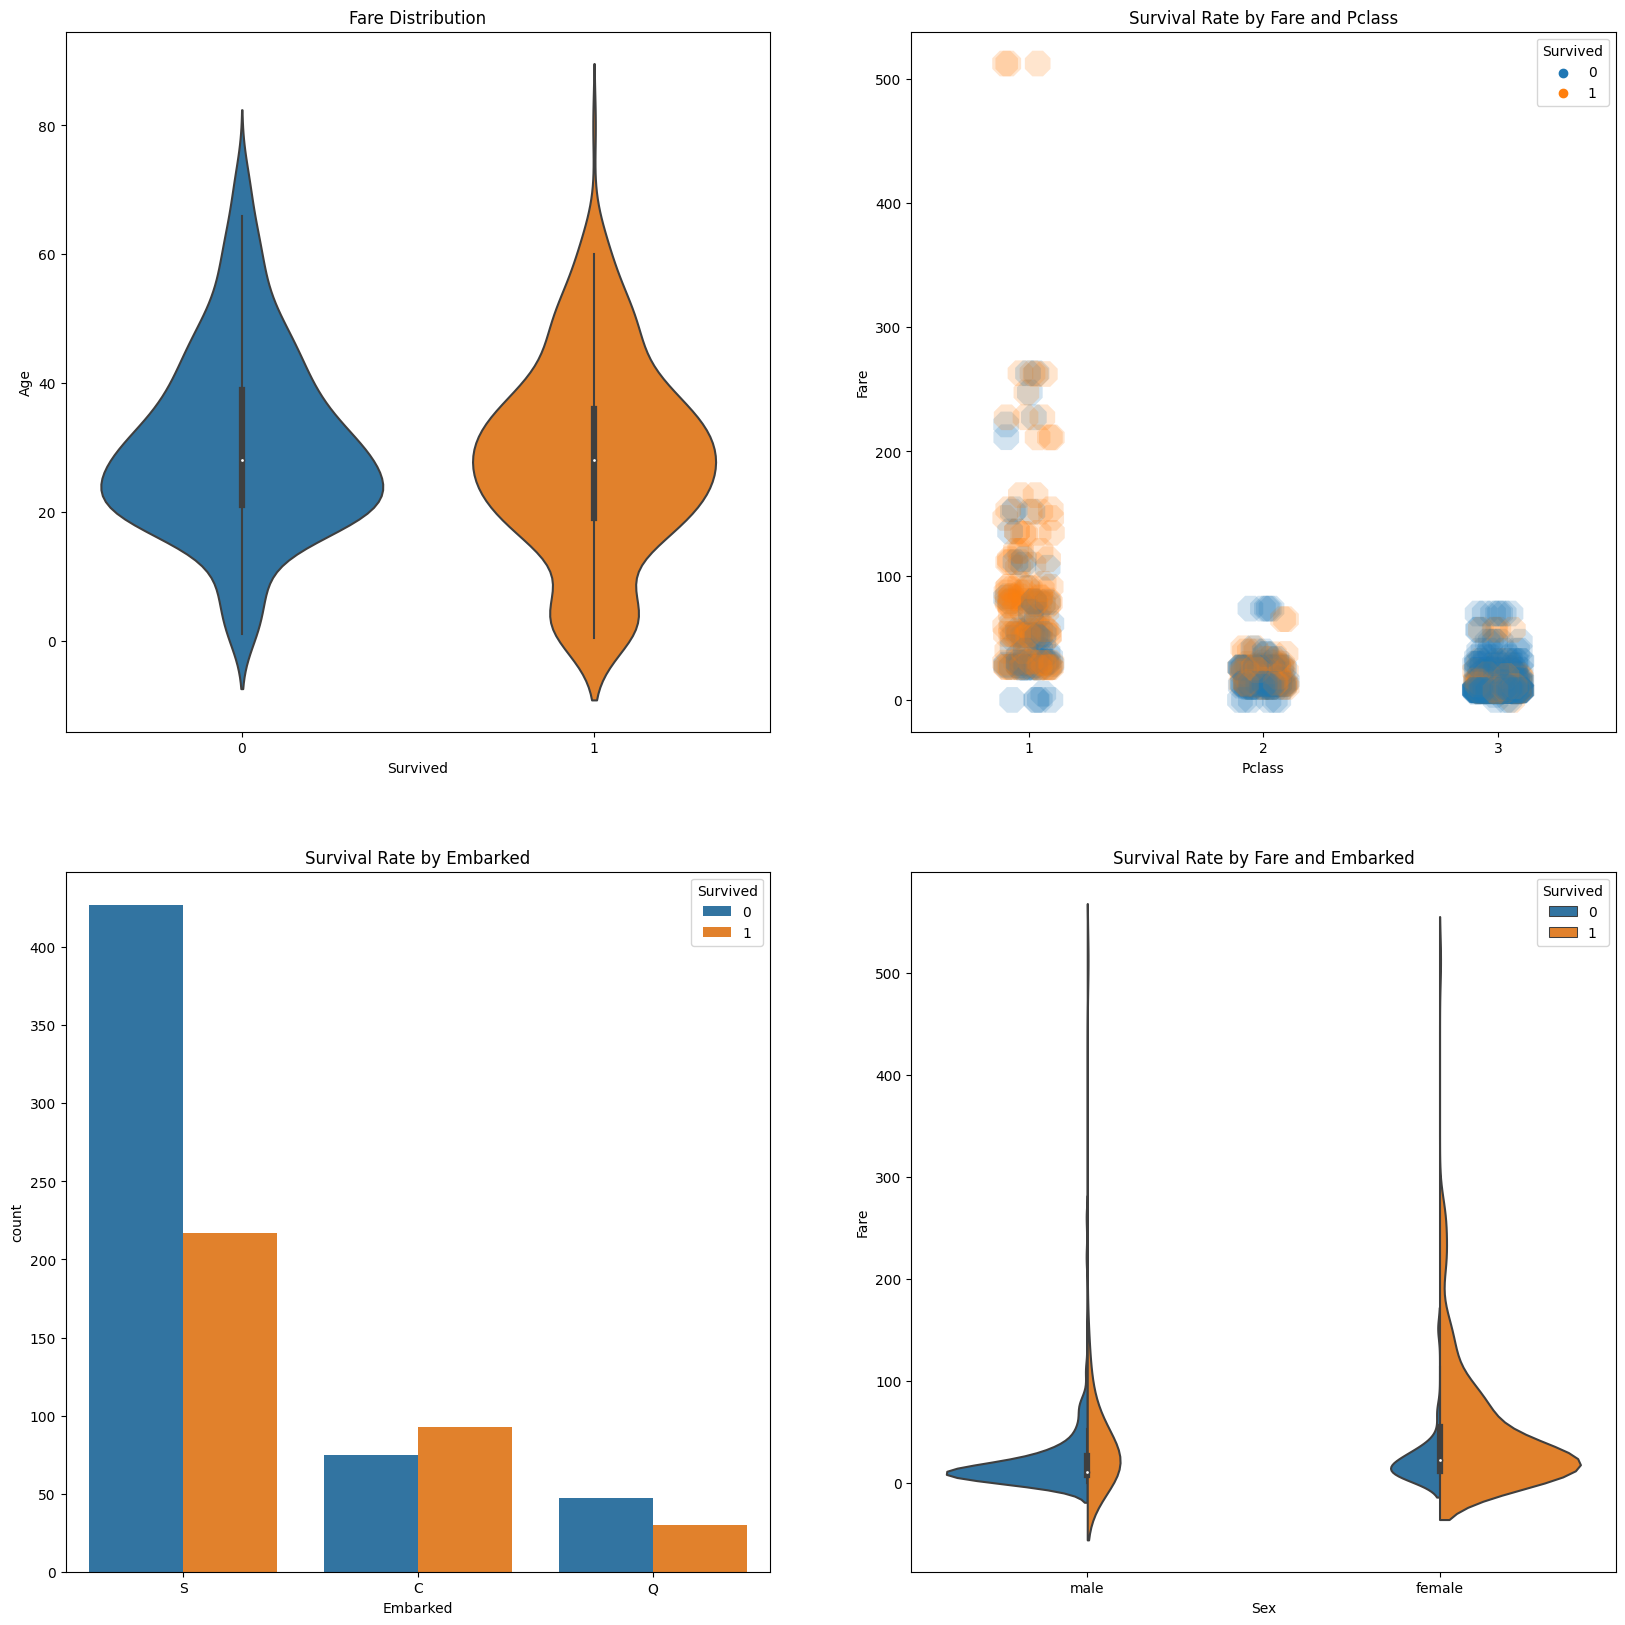

In [9]:
f,ax=plt.subplots(2,2, figsize=(20, 20))


sns.violinplot(y=train['Age'].dropna(),x=train['Survived'].dropna(), ax=ax[0,0]) # The ticket prices distribution
ax[0,0].set_title('Fare Distribution')
sns.stripplot(x='Pclass',y='Fare',hue='Survived',data=train,ax=ax[0,1], s=20, marker="8",edgecolor='none', alpha=.2) # Survival rate by class and ticket cost
ax[0,1].set_title('Survival Rate by Fare and Pclass')
sns.countplot(x='Embarked',hue='Survived',data=train,ax=ax[1,0]) # Survival rate by the embarking place
ax[1,0].set_title('Survival Rate by Embarked')
sns.violinplot(x='Sex',y='Fare',data=train,ax=ax[1,1], hue='Survived',scale="count", split=True, dodge=True, s=10) # Survival rate by class and ticket cost
ax[1,1].set_title('Survival Rate by Fare and Embarked')

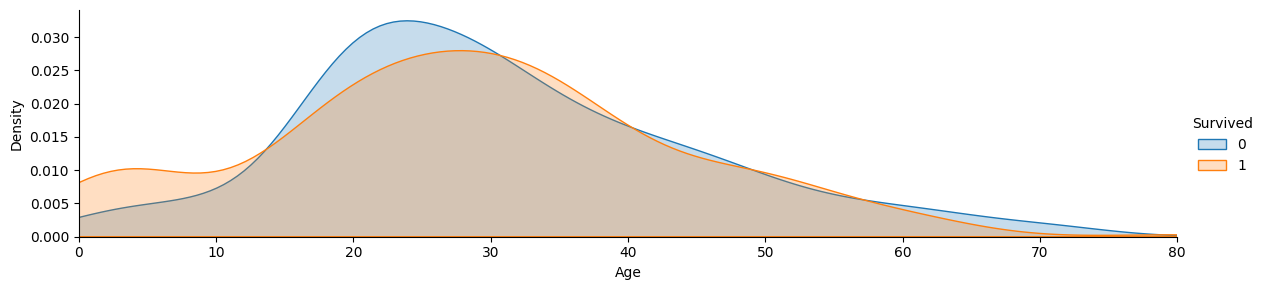

In [10]:
facet = sns.FacetGrid(train, hue="Sex",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [11]:
print(train.count()) # counts the not null values

PassengerId        891
Survived           891
Pclass             891
Name               891
Sex                891
Age                714
SibSp              891
Parch              891
Ticket             891
Fare               891
Cabin              204
Embarked           889
Pclass_category    891
dtype: int64


In [12]:
total = train.isnull().sum().sort_values(ascending = False) # finding the N/A values and summing them up
print(total)

Cabin              687
Age                177
Embarked             2
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Pclass_category      0
dtype: int64


In [13]:
percent_1 = train.isnull().sum()/train.shape[0]*100 # Alternative - train.isnull().sum()/train.isnull().count() - if the seconf isnull() is not used, it will count the notnull values, but in case if the isnull() is used, it count all the output rows
print(percent_1)

PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Name                0.000000
Sex                 0.000000
Age                19.865320
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000000
Cabin              77.104377
Embarked            0.224467
Pclass_category     0.000000
dtype: float64


# 2.Data manipulation

## 2.1 Data Imputation

In [14]:
print(train.Embarked.mode())

0    S
Name: Embarked, dtype: object


In [15]:
# Embarked (2 missing values)
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True) # filles in the empty values in the embarked with the mode value in the set,
                                                                # the 'inplace' flag indicates if the function returns a new value(if false), or makes changes in the same dataframe)
                                                                # the [0] is specified as there might be several mode values

In [16]:
total = train.isnull().sum().sort_values(ascending = False) # finding the N/A values and summing them up(TRUE as 1)
print(total)

Cabin              687
Age                177
PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Embarked             0
Pclass_category      0
dtype: int64


Text(0.5, 1.0, 'Missing values heatmap')

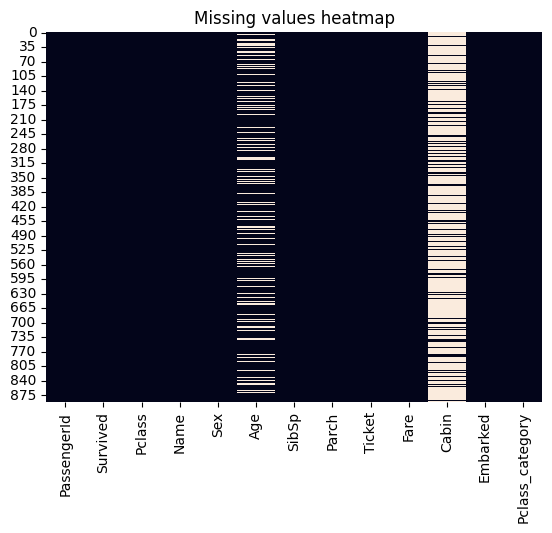

In [17]:
sns.heatmap(train.isnull(), cbar = False).set_title("Missing values heatmap")